# **MULTIPLE LINEAR REGRESSION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### **DATA ANALYSIS**

In [4]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.shape

(50, 5)

In [6]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [7]:
dfc = df.replace(to_replace=['California', 'New York', 'Florida'], value=[1, 2,3])

In [8]:
dfc.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,3,166187.94


### **FEATURE SELECTION**

In [9]:
dfc.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.980000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.820403,40306.180338
min,0.000000,51283.140000,0.000000,1.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,1.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,2.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,3.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,3.000000,192261.830000


In [10]:
dfc.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.144221,0.972900
Administration,0.241955,1.000000,-0.032154,0.015055,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.216639,0.747766
State,0.144221,0.015055,0.216639,1.000000,0.151829
Profit,0.972900,0.200717,0.747766,0.151829,1.000000


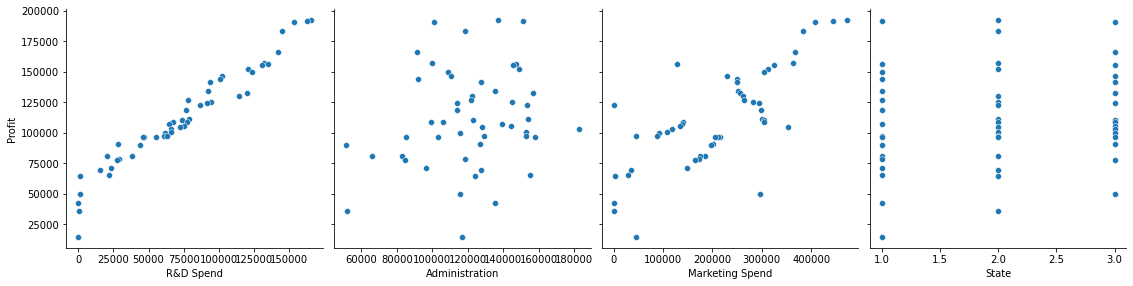

In [11]:
sns.pairplot(dfc, x_vars=['R&D Spend', 'Administration','Marketing Spend','State'], y_vars='Profit', height=4, aspect=1, kind='scatter')
plt.show()

In [12]:
features = ['R&D Spend', 'Administration','Marketing Spend']
target = 'Profit'

X = dfc[features].values.reshape(-1, len(features))
y = dfc[target].values

### **DATA SPLITTING**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [15]:
#from sklearn.preprocessing import StandardScaler

In [16]:
#sc = StandardScaler()

In [17]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)

In [14]:
X_train

array([[     0.  , 116983.8 ,  45173.06],
       [101913.08, 110594.11, 229160.95],
       [   542.05,  51743.15,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 61994.48, 115641.28,  91131.24],
       [ 27892.92,  84710.77, 164470.71],
       [ 28663.76, 127056.21, 201126.82],
       [ 77044.01,  99281.34, 140574.81],
       [  1315.46, 115816.21, 297114.46],
       [ 63408.86, 129219.61,  46085.25],
       [ 64664.71, 139553.16, 137962.62],
       [165349.2 , 136897.8 , 471784.1 ],
       [ 55493.95, 103057.49, 214634.81],
       [ 73994.56, 122782.75, 303319.26],
       [153441.51, 101145.55, 407934.54],
       [ 46014.02,  85047.44, 205517.64],
       [ 44069.95,  51283.14, 197029.42],
       [ 65605.48, 153032.06, 107138.38],
       [ 72107.6 , 127864.55, 353183.81],
       [ 67532.53, 105751.03, 304768.73],
       [ 91749.16, 114175.79, 294919.57],
       [ 22177.74, 154806.14,  28334.72],
       [ 78013.11, 121597.55, 264346.06],
       [  1000.23, 124153.04,   19

In [15]:
X_test

array([[142107.34,  91391.77, 366168.42],
       [130298.13, 145530.06, 323876.68],
       [     0.  , 135426.92,      0.  ],
       [ 66051.52, 182645.56, 118148.2 ],
       [ 91992.39, 135495.07, 252664.93],
       [ 23640.93,  96189.63, 148001.11],
       [ 78389.47, 153773.43, 299737.29],
       [100671.96,  91790.61, 249744.55],
       [ 15505.73, 127382.3 ,  35534.17],
       [ 75328.87, 144135.98, 134050.07]])

## **MODEL TRAINING AND PREDICTION**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [17]:
model = LinearRegression()  
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
Y_pred = model.predict(X_test)

In [24]:
pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

,Actual,Predicted
0,166187.94,172284.645633
1,155752.60,160571.596665
2,42559.73,45880.585213
3,103282.38,101903.484080
4,134307.35,127708.846788
5,71498.49,70115.228713
6,111313.02,117893.512017
7,144259.40,135339.892029
8,69758.98,59591.503941
9,105733.54,110506.474491


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 5403.762846767498
Mean Squared Error: 36779460.88573866
Root Mean Squared Error: 6064.607232602839


#### Score by taking only **R&D Spend** and **Marketing Spend** as feature as they have highest correlation with **Profit**.

In [25]:
model.score(X_test, Y_test)

0.628451723809855

#### Score by not taking standardization of features`

In [25]:
model.score(X_test, Y_test)

0.7988468062104331

#### Score by taking all the features

In [34]:
model.score(X_test, Y_test)

0.8306475962577643

#### Score by taking all the features **except State** as it has the lowest corelation value 

In [21]:
model.score(X_test, Y_test)

0.9750270545340758

Hence now we can conclude that multi linear regression model is way better model for linear regression.

And our final MLR model has a **97.5% of accuracy score** which is way better than previous models as mentioned below.